In [34]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

folder = './data'

file1 = '/s41598-020-73558-3_sepsis_survival_primary_cohort'
file2 = '/s41598-020-73558-3_sepsis_survival_study_cohort'

df_primary = pd.read_csv(folder + file1 + '.csv')
df_study = pd.read_csv(folder + file2 + '.csv')

In [35]:
df_primary.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [36]:
df_study.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1


In [37]:
print("\nInformações sobre o conjunto de dados:")
df_primary.info()


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [38]:
print("\nInformações sobre o conjunto de dados:")
df_study.info()


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB


In [39]:
print("\nEstatísticas descritivas do conjunto de dados primary")
print(df_primary.describe())
print("\n-----------\n")
print(df_study.describe())


Estatísticas descritivas do conjunto de dados primary
           age_years  sex_0male_1female  episode_number  \
count  110204.000000      110204.000000   110204.000000   
mean       62.735255           0.473948        1.349379   
std        24.126806           0.499323        0.751799   
min         0.000000           0.000000        1.000000   
25%        51.000000           0.000000        1.000000   
50%        68.000000           0.000000        1.000000   
75%        81.000000           1.000000        1.000000   
max       100.000000           1.000000        5.000000   

       hospital_outcome_1alive_0dead  
count                  110204.000000  
mean                        0.926455  
std                         0.261031  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         1.000000  
max                         1.000000  

-----------

          age_years  sex_0male_1female  episode_

In [40]:
print("\nValores ausentes no conjunto de dados:")
print(df_primary.isnull().sum())
print("\n-----------\n")
print(df_study.isnull().sum())


Valores ausentes no conjunto de dados:
age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

-----------

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64


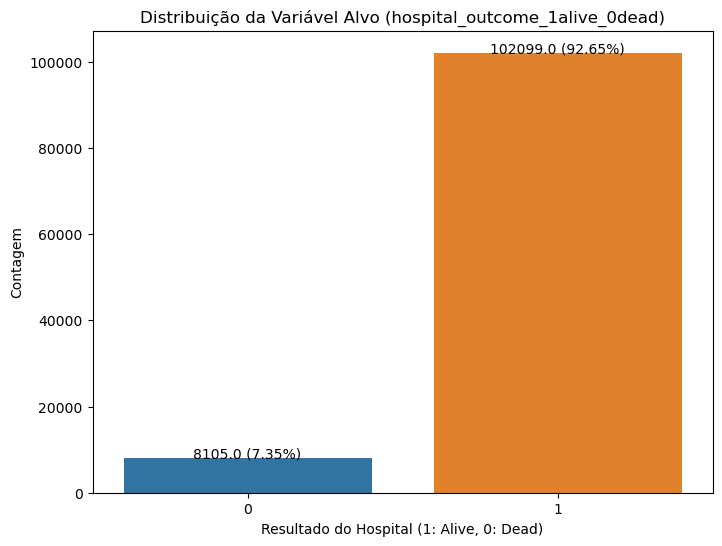

In [41]:
### Primary

# Visualizar a distribuição da variável alvo 'hospital_outcome_1alive_0dead'
plt.figure(figsize=(8, 6))
sns.countplot(x='hospital_outcome_1alive_0dead', data=df_primary)
plt.title('Distribuição da Variável Alvo (hospital_outcome_1alive_0dead)')
plt.xlabel('Resultado do Hospital (1: Alive, 0: Dead)')
plt.ylabel('Contagem')

total = float(len(df_primary))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height / total * 100:.2f}%)',
            ha="center")

plt.show()

#### Insights sobre o gráfico:
    - É possível ver que 7,35% dos casos tiveram óbitos enquanto 92,65% dos casos não tiveram óbito, resultando em sobrevivência.
    
   

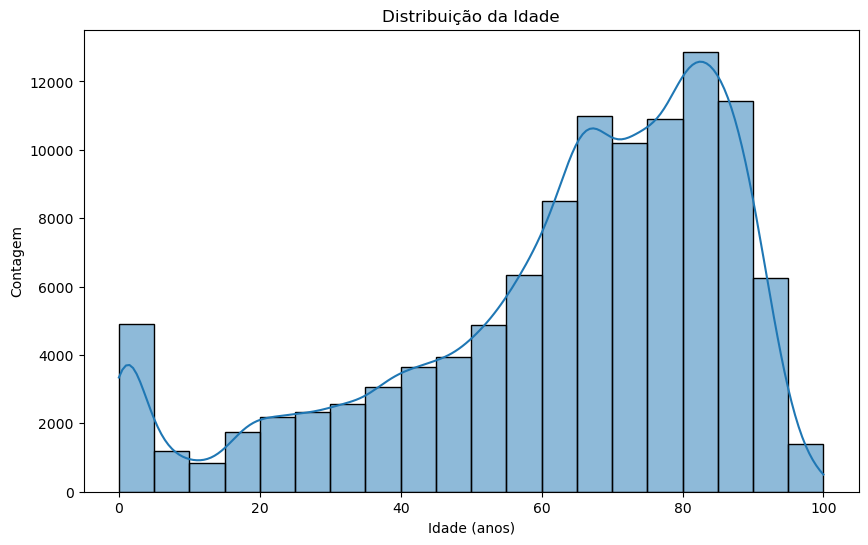

In [42]:
# Visualizar a distribuição da idade (age_years)
plt.figure(figsize=(10, 6))
sns.histplot(x='age_years', data=df_primary, bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.show()

##### Comentários sobre o gráfico:
    - É possível ver que há uma concentração de casos na faixa etária 80-85 anos. O que é de se esperar já que vários estudos comprovam a relação do risco de sepse com idades elevadas.
    - É possível notar que há um grande número de casos em pacientes bebês, entre 0 e 5 anos, o que confirma outros estudos científicos a respeito da probabilidade de sepse em recém nascidos.
    - É possível ver que quanto mais a idade avança, maior o número de casos, sem exceção. A única observação é que aos 90 anos, o número de casos tem um decrescimento.

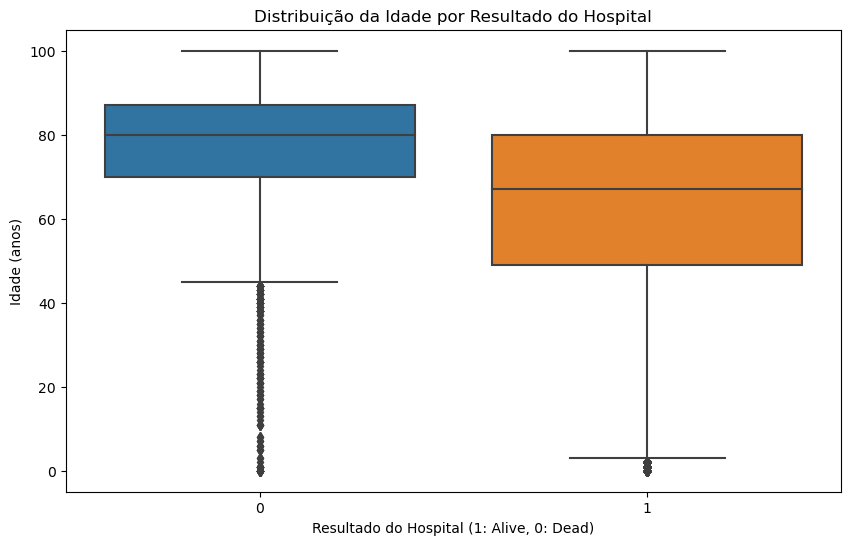

In [43]:
# Visualizar a distribuição da idade por resultado do hospital
plt.figure(figsize=(10, 6))
sns.boxplot(x='hospital_outcome_1alive_0dead', y='age_years', data=df_primary)
plt.title('Distribuição da Idade por Resultado do Hospital')
plt.xlabel('Resultado do Hospital (1: Alive, 0: Dead)')
plt.ylabel('Idade (anos)')
plt.show()

##### Insights sobre o gráfico:

    - O gráfico apresenta uma distribuição assimétrica para ambas as classes (vivos e mortos).
    - A maioria dos pacientes está concentrada nas faixas etárias mais baixas (entre 0 e 40 anos).
    - A probabilidade de morte aumenta com a idade em ambas as classes.
    - A diferença na probabilidade de morte entre as classes é mais significativa nas faixas etárias mais elevadas.
    - Pacientes mais jovens têm maior chance de sobreviver ao tratamento hospitalar.
    - Pacientes mais velhos apresentam maior risco de morte.
    - A idade é um fator de risco importante para o resultado do tratamento hospitalar.

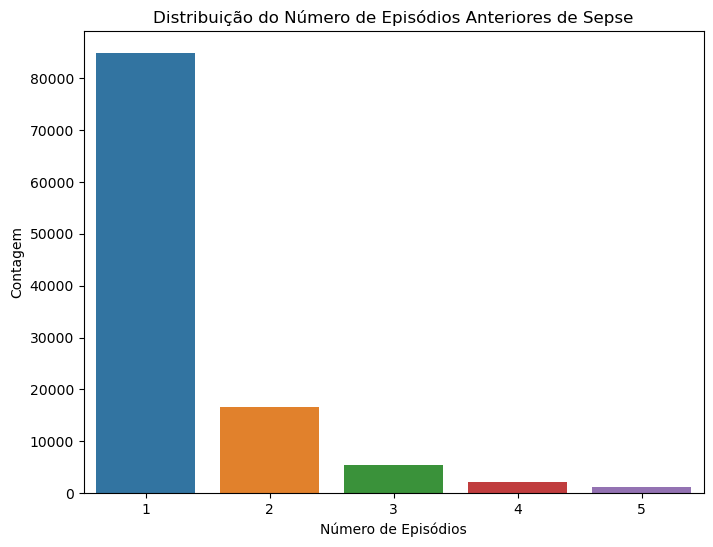

In [44]:
# Visualizar a distribuição da quantidade de episódios anteriores de sepse (episode_number)
plt.figure(figsize=(8, 6))
sns.countplot(x='episode_number', data=df_primary)
plt.title('Distribuição do Número de Episódios Anteriores de Sepse')
plt.xlabel('Número de Episódios')
plt.ylabel('Contagem')
plt.show()

##### Insights sobre o gráfico:

    - O número de pacientes diminui com o aumento do número de episódios anteriores de sepse.
    - A distribuição é assimétrica à direita, com uma cauda longa para valores mais altos de episódios anteriores de sepse.

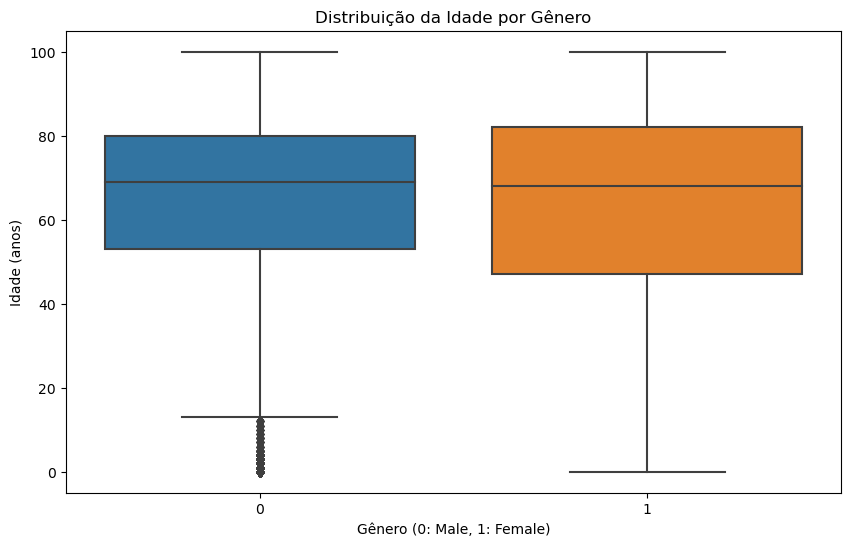

In [45]:
# Distribuição da idade por resultado do hospital usando
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex_0male_1female', y='age_years', data=df_primary)
plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Gênero (0: Male, 1: Female)')
plt.ylabel('Idade (anos)')
plt.show()

##### Insights sobre o gráfico:

    - A maioria dos pacientes está concentrada nas faixas etárias mais baixas (entre 0 e 40 anos).
    - Há um ligeiro aumento no número de pacientes do sexo feminino nas faixas etárias mais elevadas.
    - A distribuição da idade não parece ser significativamente diferente entre os gêneros.

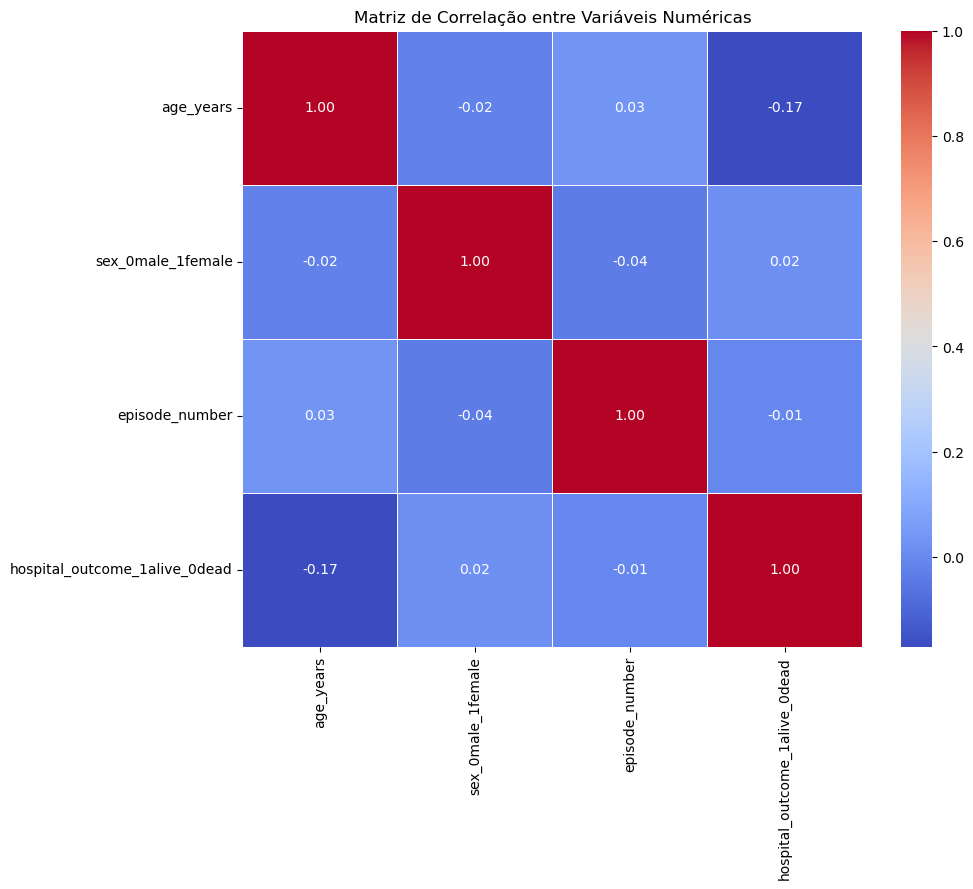

In [46]:
# Análises estatísticas

# Matriz de correlação entre variáveis numéricas

correlation_matrix = df_primary.corr()

# Criar o gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

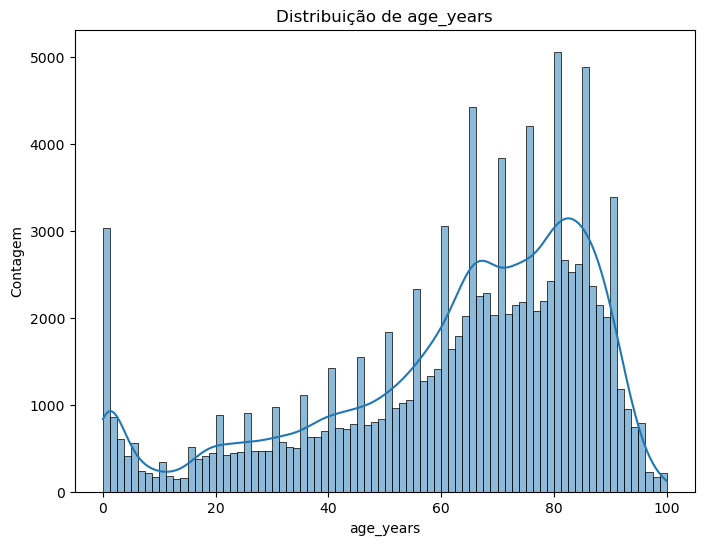

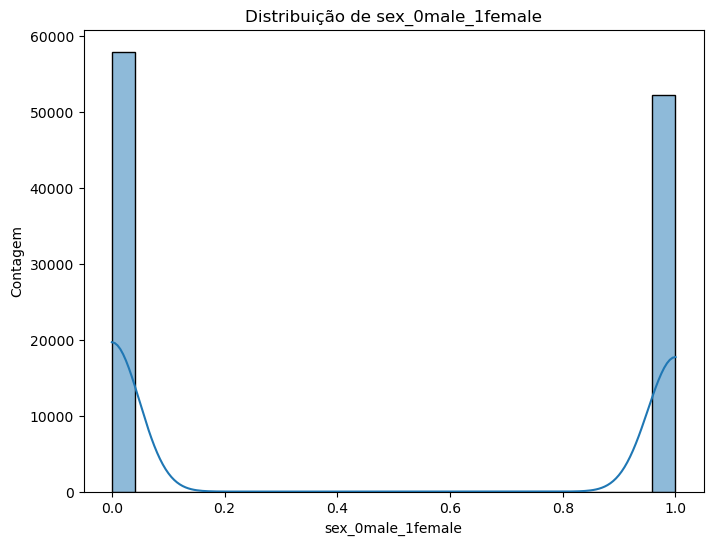

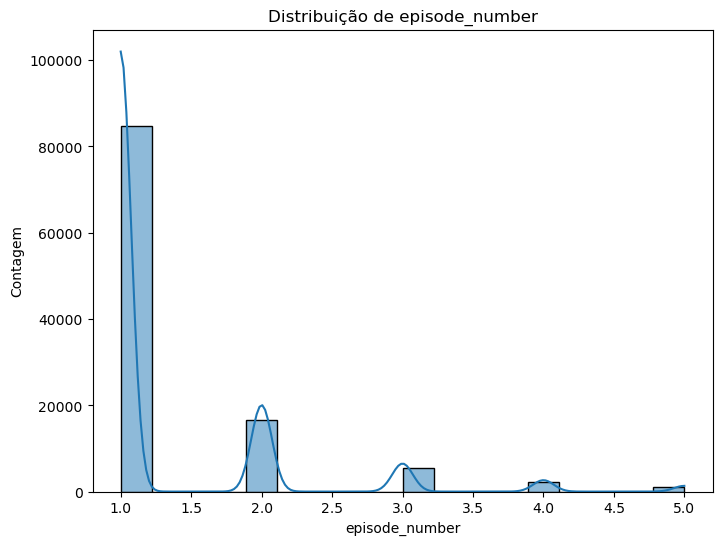

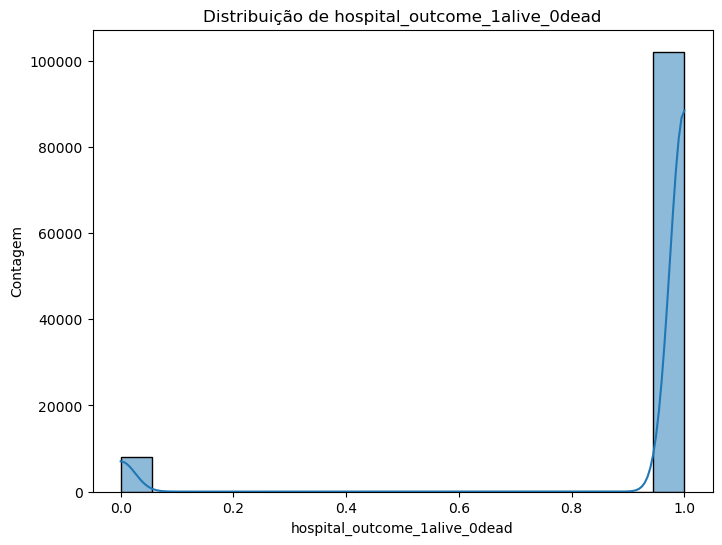

In [47]:
# Explorando as variáveis numéricas

numeric_variables = df_primary.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_primary[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.show()

In [48]:
# Explorando variáveis categóricas

categorical_variables = df_primary.select_dtypes(include=['object']).columns

for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_primary)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()